<a href="https://colab.research.google.com/github/Areefahnk/NLP---18K41A0505/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP Assignment 2**

**AREEFA - 18K41A0505**

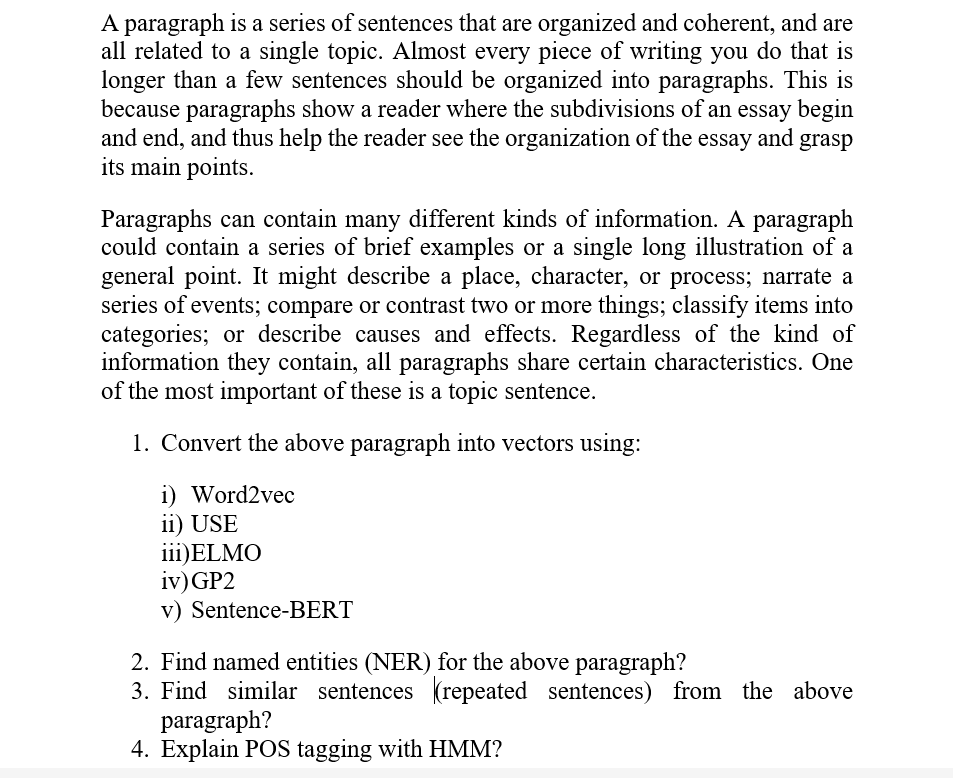

In [2]:
my_para='''A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.
Paragraphs can contain many different kinds of information. A paragraph could contain a series of brief examples or a single long illustration of a general point. It might describe a place, character, or process; narrate a series of events; compare or contrast two or more things; classify items into categories; or describe causes and effects. Regardless of the kind of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence.
'''

**1. Convert the above paragraph into vectors using:**

i) Word2vec

ii) USE

iii) Sentence-BERT

iv)ELMO

v) GP2



In [3]:
my_para

'A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.\nParagraphs can contain many different kinds of information. A paragraph could contain a series of brief examples or a single long illustration of a general point. It might describe a place, character, or process; narrate a series of events; compare or contrast two or more things; classify items into categories; or describe causes and effects. Regardless of the kind of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence.\n'

In [4]:
import numpy as np
import re
import nltk
import gensim
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.tokenize import PunktSentenceTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**i) Word2vec**

In [5]:
#code to convert paragraph to sentences
def essay_to_sentences(paragraph):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(paragraph.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append((raw_sentence))
    return sentences

sentences=essay_to_sentences(my_para)

sentences

['A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic.',
 'Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs.',
 'This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.',
 'Paragraphs can contain many different kinds of information.',
 'A paragraph could contain a series of brief examples or a single long illustration of a general point.',
 'It might describe a place, character, or process; narrate a series of events; compare or contrast two or more things; classify items into categories; or describe causes and effects.',
 'Regardless of the kind of information they contain, all paragraphs share certain characteristics.',
 'One of the most important of these is a topic sentence.']

In [6]:
wordvecs=[nltk.word_tokenize(s) for s in sentences]
from nltk.corpus import stopwords
nltk.download('stopwords')
stops_words=list(set(stopwords.words("english")))


for i in wordvecs:
  for j in i:
    if j in stops_words:
      i.remove(j)
    elif len(j)==1:
      i.remove(j)

model=gensim.models.Word2Vec(wordvecs,min_count=1,size=32)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#printing vector form of word 'organized'
model['organized']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 0.01470508, -0.00062455, -0.01094526, -0.01479711,  0.0088128 ,
        0.00301116, -0.00955996,  0.00808332, -0.00569135, -0.0077232 ,
       -0.01413033,  0.00230405, -0.00680041, -0.0133954 ,  0.0082516 ,
        0.00186448,  0.00623894, -0.01172577, -0.00241814,  0.01259937,
        0.00409546,  0.00567039, -0.01000699, -0.00777579, -0.00573819,
        0.01515098, -0.00448847,  0.01007635,  0.01198654, -0.00499677,
        0.01098786, -0.01418287], dtype=float32)

In [8]:
#finding similar words of word 'organized' in given paragraph
model.most_similar('organized')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('series', 0.3199828267097473),
 ('Almost', 0.28107044100761414),
 ('reader', 0.2787715792655945),
 ('is', 0.2529997229576111),
 ('subdivisions', 0.2500666081905365),
 ('point', 0.20248401165008545),
 ('contain', 0.19512420892715454),
 ('every', 0.19303593039512634),
 ('things', 0.19049890339374542),
 ('Paragraphs', 0.18207290768623352)]

**ii) USE**

In [9]:
import tensorflow_hub as hub
vect=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#converting to vectors
res_vectors=vect(sentences)
print(res_vectors)

tf.Tensor(
[[ 0.01168496 -0.0306057   0.06116336 ... -0.08641754  0.00025049
   0.0548275 ]
 [ 0.02972507 -0.03655472  0.08002592 ... -0.07038905 -0.02832128
   0.04804675]
 [ 0.07221662 -0.04182234  0.05336688 ... -0.06942354  0.01795933
   0.06641506]
 ...
 [ 0.01586951 -0.05243038  0.06065089 ... -0.06435592  0.04215745
   0.06304207]
 [ 0.04141247  0.0258891  -0.00625629 ... -0.0216299   0.00910816
   0.03623573]
 [ 0.0157841  -0.02142678  0.00402447 ... -0.09605584 -0.06707881
   0.0797038 ]], shape=(8, 512), dtype=float32)


In [10]:
print("shape= ",res_vectors[0].shape)
#each sentence is converted into vector having 512 values
print("The sentence: ",sentences[0],"\n is converted as : \n{}".format(res_vectors[0]))

shape=  (512,)
The sentence:  A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 is converted as : 
[ 1.16849560e-02 -3.06057017e-02  6.11633621e-02  8.47723708e-02
 -5.83404489e-03  2.84163468e-03  2.59479191e-02  3.90258408e-03
 -5.55585772e-02  5.68110794e-02 -8.95015243e-03 -4.50466387e-03
 -6.06310442e-02  3.18566710e-02 -6.86047748e-02 -9.39451531e-02
 -4.23613824e-02  3.93056907e-02 -9.02280435e-02 -5.53664006e-02
 -1.92775275e-03  5.99910133e-02  9.42121632e-03  6.07980192e-02
 -5.22601139e-03  1.28727444e-02 -2.15456896e-02 -4.93353941e-02
 -6.26435649e-05 -4.05308716e-02  7.90261030e-02 -5.32253878e-03
 -2.70436448e-03 -1.01282923e-02 -6.41689077e-02  2.35940833e-02
  4.94742952e-02  1.76912267e-02 -7.69225741e-03  2.03442983e-02
  1.55387660e-02  4.64376099e-02  3.61865498e-02  4.38465402e-02
  6.95741177e-02  2.37604082e-02 -1.20333314e-03 -4.55583967e-02
 -3.44719328e-02  1.63743850e-02 -2.70779827e-03  5.60244247

**iii.SENTENCE -BERT**

In [11]:
#importing sentencebert model
bert = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings=bert(sentences)
print(embeddings)

tf.Tensor(
[[ 0.58439595  0.03570241  0.07089429 ...  0.16468506  0.01362591
  -0.17049454]
 [ 0.5674903  -0.03022472  0.14544438 ...  0.08465072  0.04284173
   0.03154207]
 [ 0.83034104  0.16388969 -0.03244966 ... -0.20251456  0.12385168
   0.08940062]
 ...
 [ 0.4393374   0.02327457  0.12449443 ...  0.05474888 -0.09519409
   0.00303834]
 [ 0.2909918   0.06627773  0.08403497 ... -0.10017543 -0.11646989
   0.00867226]
 [ 0.5081561  -0.04534546  0.09999924 ...  0.06375446 -0.00892024
  -0.03128232]], shape=(8, 128), dtype=float32)


In [12]:
print("shape=",embeddings[0].shape)
#each sentence is converted into vector having 128 values
print("The sentence in the paragraph: ",sentences[0],"\n is converted into vector  as : \n{}".format(embeddings[0]))
shape= (128,)

shape= (128,)
The sentence in the paragraph:  A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 is converted into vector  as : 
[ 0.58439595  0.03570241  0.07089429  0.07733776 -0.01214658 -0.12435579
 -0.07824828 -0.00274544 -0.17964575  0.21627969  0.03844824 -0.19277166
 -0.12646586  0.02667335 -0.13363229 -0.00374018 -0.06618838  0.00353754
 -0.21084203  0.18731229  0.06417363  0.03025784  0.01986333 -0.08417947
  0.03461034 -0.10283548 -0.0499575  -0.07064839 -0.04805086  0.01945524
 -0.00223823 -0.05097701 -0.06611909 -0.20404741  0.0077603  -0.030263
  0.045775   -0.12902436 -0.01877959  0.01619794  0.11104539 -0.08053494
  0.23449406 -0.0133885  -0.07351163  0.15601118  0.01348254 -0.12100593
 -0.0793598  -0.02779575  0.01043605 -0.05894459  0.05691529  0.06368439
  0.0845022   0.00101441  0.09372724 -0.0798301   0.05913398 -0.1558554
 -0.10184948 -0.02461847 -0.02784929 -0.08858608  0.03941965 -0.16783947
 -0.1457897

**iv.ELMOS**

In [13]:
!pip install "tensorflow>=2.0.0"
!pip install --upgrade tensorflow-hub

In [14]:
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
#1024 sized vectors
elmo=hub.Module("https://tfhub.dev/google/elmo/3",trainable=True)
embeddings=elmo(
    sentences,
    signature="default",
    as_dict=True)["elmo"]
init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)
print("\n\n")
print(sess.run(embeddings[0]))
print("shape=",embeddings[0].shape)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.





[[ 0.29286996 -0.14378002 -0.32574052 ... -0.39559275 -0.35758832
  -0.03588067]
 [-0.59441644  0.09640661  0.50537676 ...  0.22031897  0.26976916
   0.46307242]
 [-0.17083307 -0.18744141 -0.27626717 ... -0.6755089   0.25390008
   0.654027  ]
 ...
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]]
shape= (32, 1024)


**v. GP2**

In [15]:
import torch
!pip install transformers

In [16]:
import transformers
gptokenizer=transformers.GPT2Tokenizer.from_pretrained('gpt2-large')
model=transformers.GPT2LMHeadModel.from_pretrained('gpt2-large')
res_vectors=gptokenizer.encode(my_para,add_special_tokens=False,return_tensors="pt")
print("shape=",res_vectors.shape)
res_vectors

shape= torch.Size([1, 173])


tensor([[   32,  7322,   318,   257,  2168,   286, 13439,   326,   389,  8389,
           290, 24870,    11,   290,   389,   477,  3519,   284,   257,  2060,
          7243,    13, 16699,   790,  3704,   286,  3597,   345,   466,   326,
           318,  2392,   621,   257,  1178, 13439,   815,   307,  8389,   656,
         23549,    13,   770,   318,   780, 23549,   905,   257,  9173,   810,
           262, 45944,  3279,   286,   281, 14268,  2221,   290,   886,    11,
           290,  4145,  1037,   262,  9173,   766,   262,  4009,   286,   262,
         14268,   290, 13180,   663,  1388,  2173,    13,   198, 10044,  6111,
            82,   460,  3994,   867,  1180,  6982,   286,  1321,    13,   317,
          7322,   714,  3994,   257,  2168,   286,  4506,  6096,   393,   257,
          2060,   890, 20936,   286,   257,  2276,   966,    13,   632,  1244,
          6901,   257,  1295,    11,  2095,    11,   393,  1429,    26,  6664,
           378,   257,  2168,   286,  2995,    26,  

**2. Find named entities (NER) for the above paragraph?**

In [17]:
import spacy
from spacy import displacy
ner=spacy.load('en')
res=ner(my_para)

for word in res.ents:
  print(word.text,word.label_)

two CARDINAL
One CARDINAL


In [18]:
spacy.explain('GPE')

'Countries, cities, states'

In [20]:
#better visualisation of entity recognition
displacy.render(res,style="ent",jupyter=True)

In [21]:
para2= '''Kabaddi is a contact sport which requires two teams to compete in a match. The game has its origin in ancient Indian history as it was first conceptualized in South India.

The game is governed by the International Kabaddi Federation at a global level, whereas at a domestic level the Amateur Kabaddi Federation of India (AKFI) acts as the governing body. The game has two major formats; international and Indian. Within the Indian format there are 4 main styles; Sanjeevani, Gaminee, Amar and Punjabi.'''

In [22]:
# finding named entities of another paragraph
result=ner(para2)
for word in result.ents:
  print(word.text,word.label_)

Kabaddi ORG
two CARDINAL
Indian NORP
first ORDINAL
South India LOC
the International Kabaddi Federation ORG
the Amateur Kabaddi Federation of India ORG
AKFI ORG
two CARDINAL
Indian NORP
Indian NORP
4 CARDINAL
Sanjeevani, Gaminee, Amar ORG
Punjabi ORG


In [23]:
#better visualisation of entity recognition
displacy.render(result,style="ent",jupyter=True)

**3. Find similar sentences(repeated sentences) from the above paragraph?**

In [24]:
pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 4.2 MB/s 
     |████████████████████████████████| 1.2 MB 19.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=e189a97bd5a21e92a1de467d20e48399c90a50eba4270c353ac1e3b95f4fc64a
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


In [25]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [26]:
se_embeddings = sbert_model.encode(sentences)
q1_vec= sbert_model.encode(sentences[0])

#cosine similarity function
#identifies similarity between 2 sentences
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

for sent in sentences:
  sim = cosine(q1_vec, sbert_model.encode([sent])[0])
  #if similarity ==1 => repeated sentence
  #if similarity > 0.6 => similar sentence
  if sim>0.6:
    print("Sentence1 =",sentences[0],"\n \nSentence2=", sent, "\n\nsimilarity = ", sim,end="\n ----------------------------- \n")

Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 
Sentence2= A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 

similarity =  1.0
 ----------------------------- 
Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 
Sentence2= Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. 

similarity =  0.64775366
 ----------------------------- 
Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. 
 
Sentence2= A paragraph could contain a series of brief examples or a single long illustration of a general point. 

similarity =  0.6927288
 ----------------------------- 
Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all related to

**4.	Explain POS tagging with HMM?**

**IN DETAILED**

**POS Tagging with HMM**

Parts of Speech Tagging (POS): It is a process of converting a sentence to forms – list of words, list of tuples (where each tuple is having a form (word, tag)). The tag in case of is a part-of-speech tag, and signifies whether the word is a noun, adjective, verb, and so on. reading a sentence and being able to identify what words act as nouns, pronouns, verbs, adverbs, and so on. All these are referred to as the part of speech tags.
  According to Wikipedia, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging or word-category disambiguation, is the process of marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context i.e. its relationship with adjacent and related words in a phrase, sentence, or paragraph.

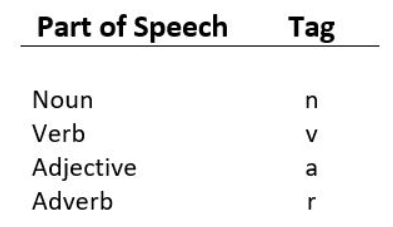

Default tagging is a basic step for the part-of-speech tagging. It is performed using the DefaultTagger class. The DefaultTagger class takes ‘tag’ as a single argument. NN is the tag for a singular noun. DefaultTagger is most useful when it gets to work with most common part-of-speech tag. that’s why a noun tag is recommended.

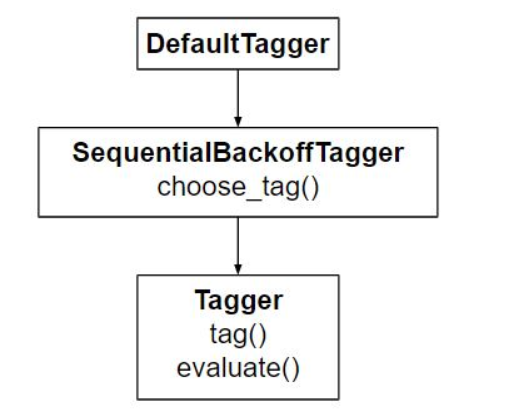

**POS tagging with Hidden Markov Model**
HMM (Hidden Markov Model) is a Stochastic technique for POS tagging. Hidden Markov models are known for their applications to reinforcement learning and temporal pattern recognition such as speech, handwriting, gesture recognition, musical score following, partial discharges, and bioinformatics.

Let us consider an example proposed by Dr.Luis Serrano and find out how HMM selects an appropriate tag sequence for a sentence.

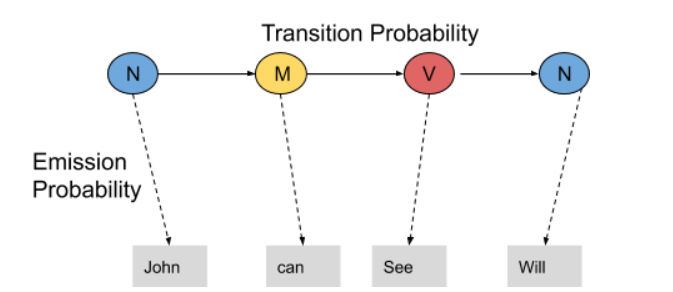

In this example, we consider only 3 POS tags that are noun, model and verb. Let the sentence “ Ted will spot Will ” be tagged as noun, model, verb and a noun and to calculate the probability associated with this particular sequence of tags we require their Transition probability and Emission probability.

The transition probability is the likelihood of a particular sequence for example, how likely is that a noun is followed by a model and a model by a verb and a verb by a noun. This probability is known as Transition probability. It should be high for a particular sequence to be correct.

Now, what is the probability that the word Ted is a noun, will is a model, spot is a verb and Will is a noun. These sets of probabilities are Emission probabilities and should be high for our tagging to be likely.

Let us calculate the above two probabilities for the set of sentences below


Mary Jane can see Will
Spot will see Mary
Will Jane spot Mary?
Mary will pat Spot
Note that Mary Jane, Spot, and Will are all names.



In the above figure, we can see that the < S > tag is followed by the N tag three times, thus the first entry is 3.The model tag follows the < S > just once, thus the second entry is 1. In a similar manner, the rest of the table is filled.

Next, we divide each term in a row of the table by the total number of co-occurrences of the tag in consideration, for example, The Model tag is followed by any other tags four times (in total) as shown below, thus we divide each element in the third row by four.


the table is refined as below:

Screenshot 2021-11-23 143123.jpg

These are the respective transition probabilities for the above four sentences.

how does the HMM determine the appropriate sequence of tags for a particular sentence from the above tables? Let us find it out.

Take a new sentence and tag them with wrong tags. Let the sentence, ‘ Will can spot Mary’ be tagged as-

Will as a model Can as a verb Spot as a noun Mary as a noun Now calculate the probability of this sequence being correct in the following manner.

image.png

The probability of the tag Model (M) comes after the tag is ¼ as seen in the table. Also, the probability that the word Will is a Model is 3/4. In the same manner, we calculate each and every probability in the graph. Now the product of these probabilities is the likelihood that this sequence is right. Since the tags are not correct, the product is zero.

1/43/43/4012/91/94/94/9=0

When these words are correctly tagged, we get a probability greater than zero as shown below

image.png

Calculating the product of these terms we get,

3/41/93/91/43/41/414/94/9=0.00025720164

For our example, keeping into consideration just three POS tags we have mentioned, 81 different combinations of tags can be formed. In this case, calculating the probabilities of all 81 combinations seems achievable. But when the task is to tag a larger sentence and all the POS tags in the Penn Treebank project are taken into consideration, the number of possible combinations grows exponentially and this task seems impossible to achieve. Now let us visualize these 81 combinations as paths and using the transition and emission probability mark each vertex and edge as shown below.

image.png

The next step is to delete all the vertices and edges with probability zero, also the vertices which do not lead to the endpoint are removed. Also, we will mention-

image.png

Now there are only two paths that lead to the end, let us calculate the probability associated with each path.

s→N→M→N→N→ E =3/41/93/91/41/42/91/94/94/9=0.00000846754

s→N→M→N→V→E=3/41/93/91/43/41/414/94/9=0.00025720164

Clearly, the probability of the second sequence is much higher and hence the HMM is going to tag each word in the sentence according to this sequence.

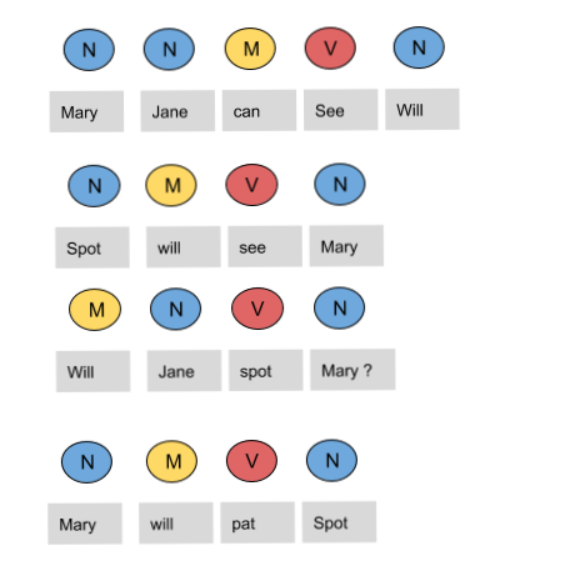
In the above sentences, the word Mary appears four times as a noun. and see appears two times as a verb. we need to calculate the probabilitiy of a word appearing as noun, verb or model. to do this, we need to calculate the emission probabilities, which represented using below table.
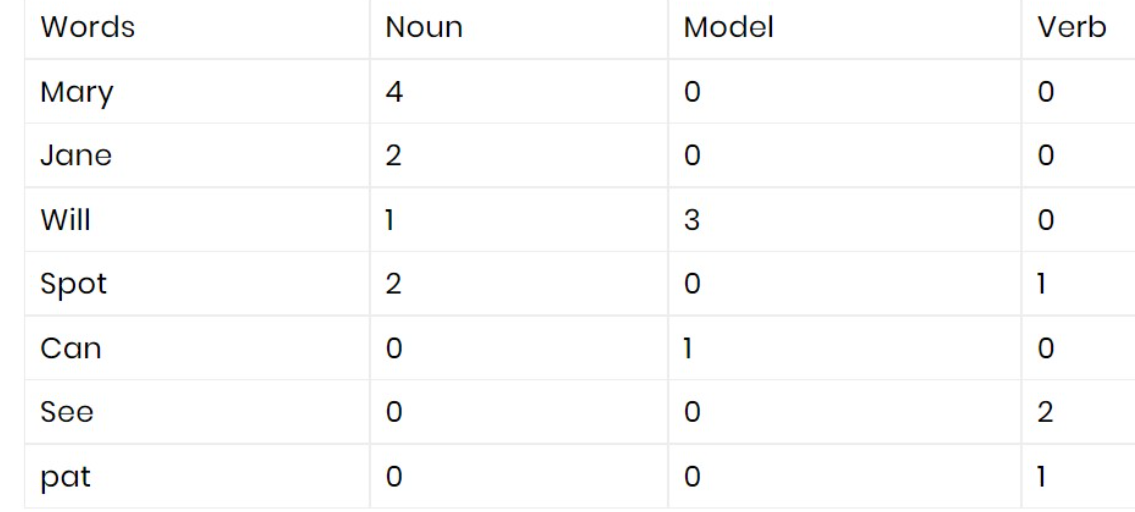



Now divide each column by the total number of their appearances .for example, ‘noun’ appears nine times in the above sentences, so divide each term by 9 in the noun column. and repeat the same for all remaining processes. We get the following table after this operation.
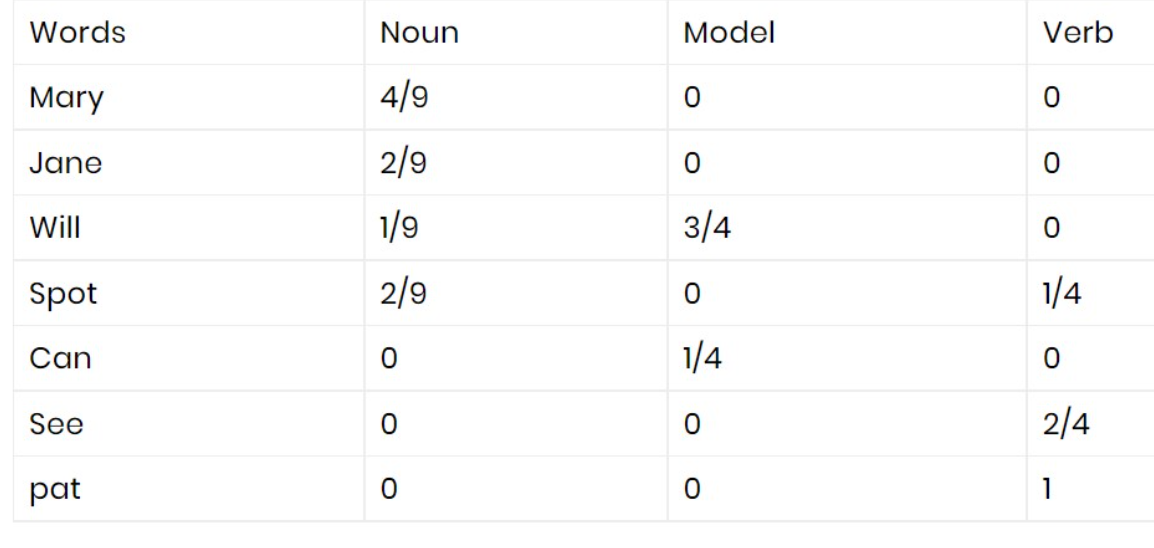

From the above table, we can conclude that

The probability that Mary is Noun = 4/9

The probability that Mary is Model = 0

The probability that Mary is Verb = 0

The probability that Will is Noun = 1/9

The probability that Will is Model = 3/4

In a similar manner, we can analyze rest of the probabilities. These are the emission probabilities.



Next, we have to calculate the transition probabilities, so define two more tags < S > and < E >. < S > is placed at the beginning of each sentence and < E > at the end as shown in the figure below.

since for first and last word there is no previous and next words, so we are adding extra dummy words. i.e < E > and < S >

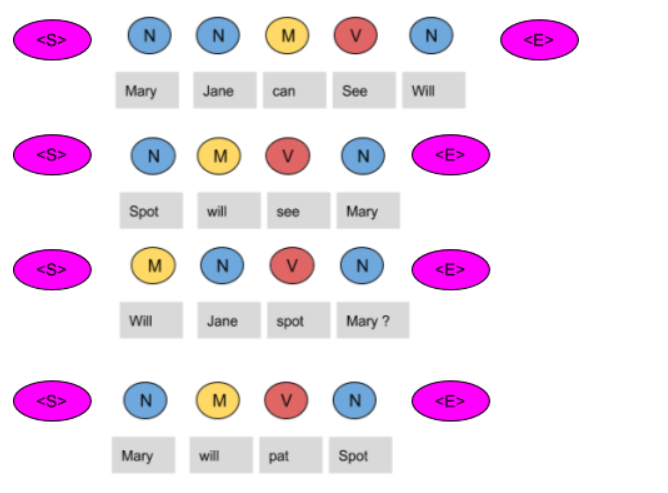

now we need to create a table and fill it with the co-occurrence counts of the tags.
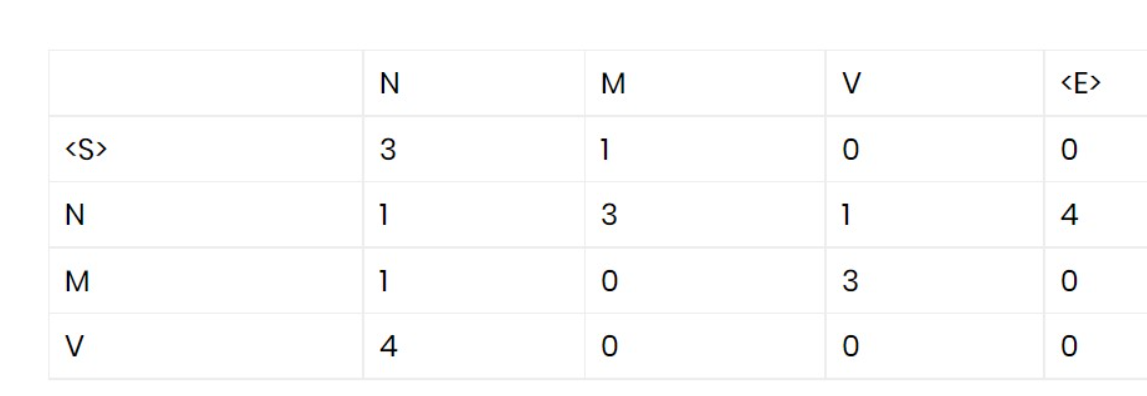


In the above figure, we can see that the < S > tag is followed by the N tag three times, thus the first entry is 3.The model tag follows the < S > just once, thus the second entry is 1. In a similar manner, the rest of the table is filled.

Next, we divide each term in a row of the table by the total number of co-occurrences of the tag in consideration, for example, The Model tag is followed by any other tags four times (in total) as shown below, thus we divide each element in the third row by four.
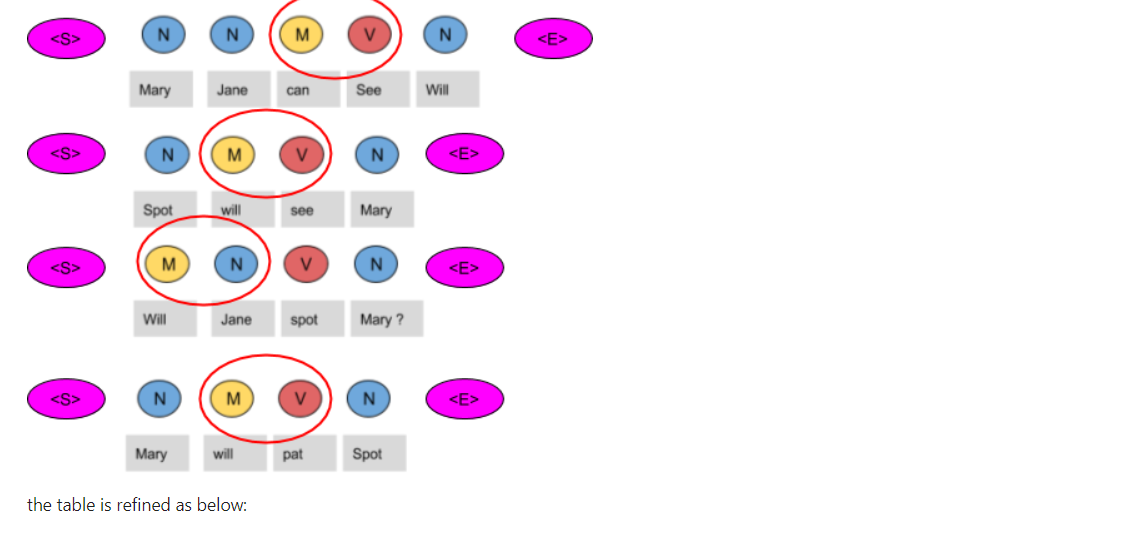

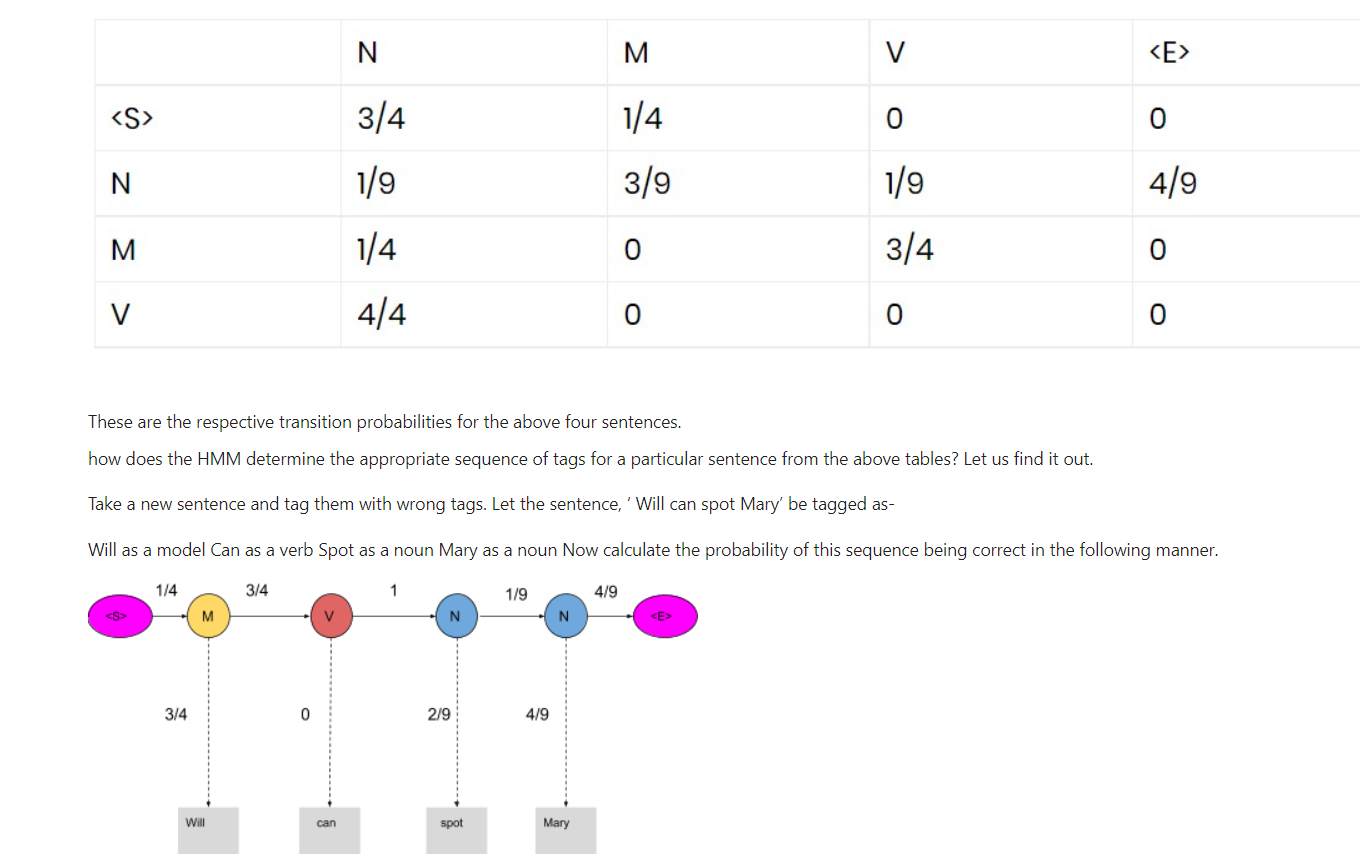

Calculating the product of these terms we get,

3/41/93/91/43/41/414/94/9=0.00025720164

For our example, keeping into consideration just three POS tags we have mentioned, 81 different combinations of tags can be formed. In this case, calculating the probabilities of all 81 combinations seems achievable. But when the task is to tag a larger sentence and all the POS tags in the Penn Treebank project are taken into consideration, the number of possible combinations grows exponentially and this task seems impossible to achieve. Now let us visualize these 81 combinations as paths and using the transition and emission probability mark each vertex and edge as shown below.

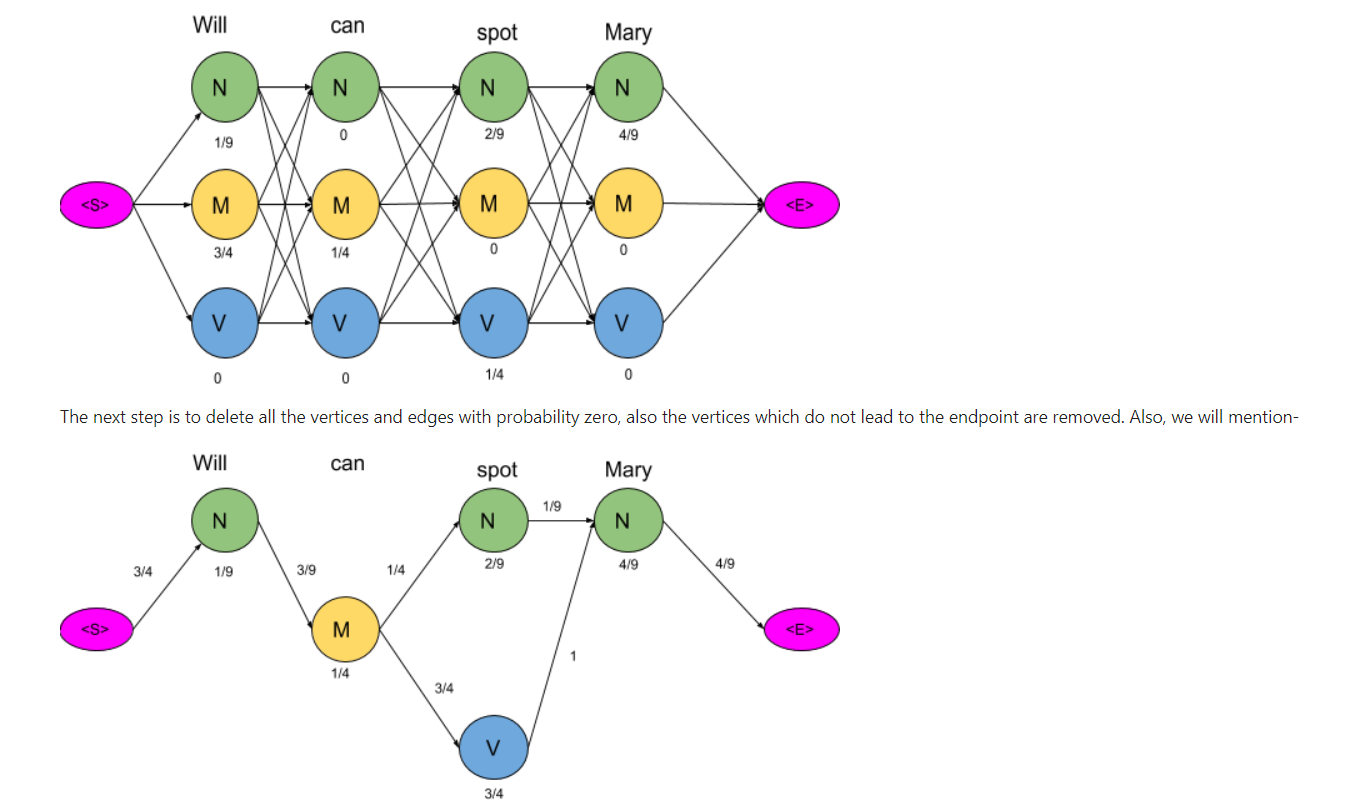

Now there are only two paths that lead to the end, let us calculate the probability associated with each path.

s→N→M→N→N→ E =3/41/93/91/41/42/91/94/94/9=0.00000846754

s→N→M→N→V→E=3/41/93/91/43/41/414/94/9=0.00025720164

Clearly, the probability of the second sequence is much higher and hence the HMM is going to tag each word in the sentence according to this sequence.